# Project: Investigate a Dataset - TMBD-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project we will analyzing data that has been collected from about 10,000 movies using the TMDb (The Movie Database). 
This data includes the id, IMBD id, the popularity of the movie, its budget, revenue, original title, cast, the homepage of the movie, its director, its tagline, keywords used for it (ex: For Jurassic World some keywords are monster, DNA, and island), the movie overview, its runtime, genre, production companies, the release date, vote count, vote average, release year, adjusted budget, and adjusted revenue. Each of these categories are very important for learning about how the movie did and it can give some insight on why it did so well or so poorly. For example, the columns giving the id, IMBD id, and original title are identifiers so people can find the movie they are looking for or so they can know what movie information they are looking at. Columns like cast, homepage, director, tagline, keywords, movie overview, runtime, genre, production companies and production companies are ways to learn about the movie its self, who helped make it and what is that movie about. While the columns budget, release date, release year, and adjusted budget are more details about the movie that the main population of people may not want or need to know about. Then the columns popularity, revenue, vote count, vote average, and adjusted revenue can help show you how successful the movie w


### Question(s) for Analysis
1. How has the amount of movies released a year changed over time
2. Is the popularity of movies getting better or worse? 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas.plotting._timeseries as ppts

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 4.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 3.4MB/s eta 0:00:01   64% |████████████████████▋           | 8.6MB 82.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [8]:
db = pd.read_csv('tmdb-movies.csv')
db.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt2395427 

In [ ]:
# we read the CSV and put it into the variable db
# the we use .head to see the first 5 rows of the csv
# this is for a begining understading of what kind of information we are dealing with

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
# we use .info to see what types of data we are working with
# we can see that that all fields are non-null, meaning that it will not accept null values
# we can also see that everything is either an int or a object (also known as string)
# that means we will needs to turn the date columns (release_date and release_year) into datetime types

In [20]:
db.shape

(10866, 21)

In [ ]:
# by useing .shape we learn the size of the data we are using
# we have 21 columns and 10866 rows (meaning we have 10866 movies)

In [24]:
db.describe

<bound method NDFrame.describe of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
5      281957  tt1663202    9.110700  135000000   532950503   
6       87101  tt1340138    8.654359  155000000   440603537   
7      286217  tt3659388    7.667400  108000000   595380321   
8      211672  tt2293640    7.404165   74000000  1156730962   
9      150540  tt2096673    6.326804  175000000   853708609   
10     206647  tt2379713    6.200282  245000000   880674609   
11      76757  tt1617661    6.189369  176000003   183987723   
12     264660  tt0470752    6.118847   15000000    36869414   
13     257344  tt2120120    5.984995   88000000   243637091   
14      99861  tt2395

In [ ]:
# when using .describe we see the count, mean, std, min, 25%, 50%, 75%, and max of the data
# it helps us see things like the mean popularity is 0.65
# and that the mean runtime is 102.07

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6f3e0ef98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6f3cdb208>]], dtype=object)

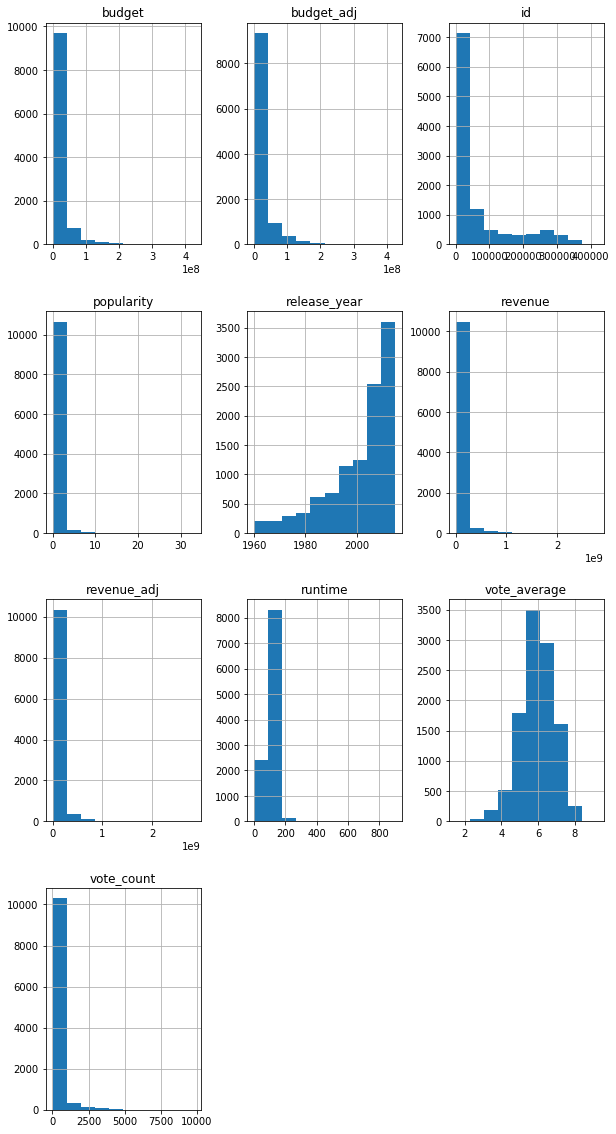

In [15]:
db.hist(figsize=(10,20))

In [16]:
# to get a general idea on how the data is shaped and moves we ust .hist to get a histogram
# from this we can see there are multiple varities of data and how the data is shaped
# we can see that that more movies are coming out as time moves on


### Data Cleaning
Crop columns, drop duplicity, if there is any
Change the lease date to date time
Drop null or 0 values from the data
 

In [38]:
# deleting (id,imdb_id,cast,homepage,tagline,keywords,overview) columns
# we first put everything into a list called to_drop
to_drop = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]

In [39]:
# then we actually drop using .drop
# we tell it to drop to_drop, we say that inplace is true to keep the changes, and that we use using the column name
db.drop(to_drop, inplace=True, axis=1)

In [40]:
# now that we have droped what we needed to, we check to make sure that thoes values did drop 
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [41]:
# Check for duplicates in the data
sum(db.duplicated())

1

In [42]:
# Drop duplicates
db.drop_duplicates(inplace=True)

In [43]:
# Check again for duplicates 
sum(db.duplicated())

0

In [50]:
# to check and see 
db.isnull

<bound method DataFrame.isnull of        popularity       budget       revenue  \
0       32.985763  150000000.0  1.513529e+09   
1       28.419936  150000000.0  3.784364e+08   
2       13.112507  110000000.0  2.952382e+08   
3       11.173104  200000000.0  2.068178e+09   
4        9.335014  190000000.0  1.506249e+09   
5        9.110700  135000000.0  5.329505e+08   
6        8.654359  155000000.0  4.406035e+08   
7        7.667400  108000000.0  5.953803e+08   
8        7.404165   74000000.0  1.156731e+09   
9        6.326804  175000000.0  8.537086e+08   
10       6.200282  245000000.0  8.806746e+08   
11       6.189369  176000003.0  1.839877e+08   
12       6.118847   15000000.0  3.686941e+07   
13       5.984995   88000000.0  2.436371e+08   
14       5.944927  280000000.0  1.405036e+09   
15       5.898400   44000000.0  1.557601e+08   
16       5.749758   48000000.0  3.257714e+08   
17       5.573184  130000000.0  5.186022e+08   
18       5.556818   95000000.0  5.423514e+08   
19    

In [51]:
# Convert 'release_date' type from str to datetime 
db["release_date"] = pd.to_datetime(db["release_date"])

In [52]:
# Replace all values of 0 with NAN (which means not a number)
db = db.replace(0, np.nan)

In [54]:
# Droping the null
df = db.dropna()

In [55]:
# Confirm correction 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null float64
revenue                 3807 non-null float64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 446.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c1644f98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc6c138ba20>]], dtype=object)

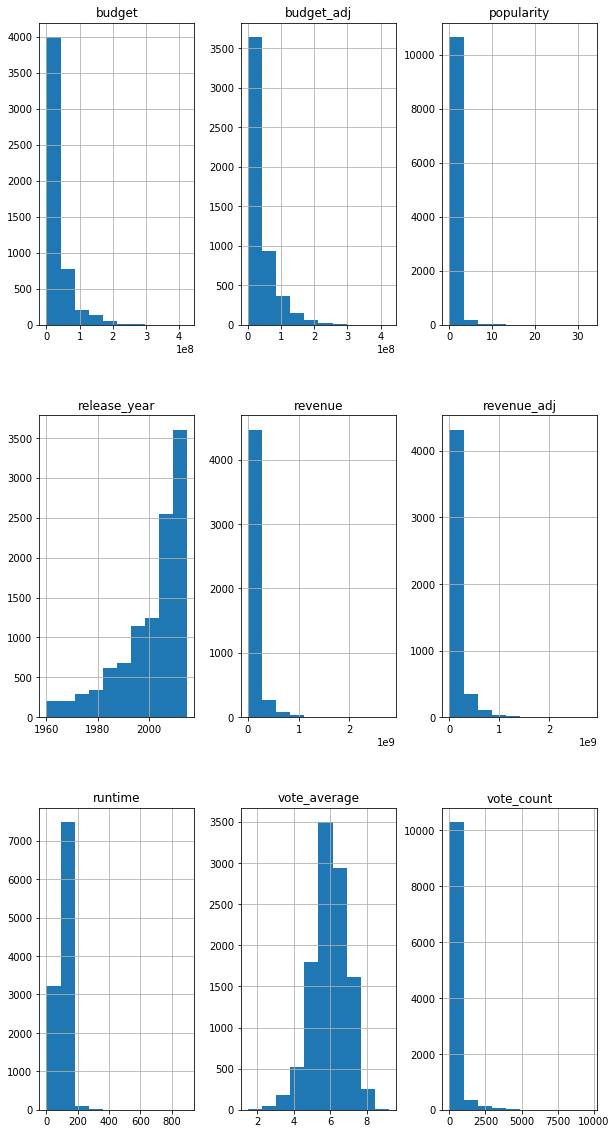

In [56]:
# we use .hist again to see if there have been any major changes to look at the data again
db.hist(figsize=(10,20))

In [57]:
# then I would also like to look at the summery of the data again
# so we call .describe 
db.describe

<bound method NDFrame.describe of        popularity       budget       revenue  \
0       32.985763  150000000.0  1.513529e+09   
1       28.419936  150000000.0  3.784364e+08   
2       13.112507  110000000.0  2.952382e+08   
3       11.173104  200000000.0  2.068178e+09   
4        9.335014  190000000.0  1.506249e+09   
5        9.110700  135000000.0  5.329505e+08   
6        8.654359  155000000.0  4.406035e+08   
7        7.667400  108000000.0  5.953803e+08   
8        7.404165   74000000.0  1.156731e+09   
9        6.326804  175000000.0  8.537086e+08   
10       6.200282  245000000.0  8.806746e+08   
11       6.189369  176000003.0  1.839877e+08   
12       6.118847   15000000.0  3.686941e+07   
13       5.984995   88000000.0  2.436371e+08   
14       5.944927  280000000.0  1.405036e+09   
15       5.898400   44000000.0  1.557601e+08   
16       5.749758   48000000.0  3.257714e+08   
17       5.573184  130000000.0  5.186022e+08   
18       5.556818   95000000.0  5.423514e+08   
19    

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: how has the amount of movies released a year changed over time?
We will work with two variables, The independent varible is the time in release_year column and the dependent varible is the number of movies.
Before we go into the actual answering of the data, lets take a look of some minimums and maxes of the data, to understand more of the range we are dealing with.

In [136]:
db.release_year.min()

1960

In [137]:
db.release_year.max()

2015

In [138]:
db.release_date.min()

Timestamp('1974-01-01 00:00:00')

In [139]:
db.release_date.max()

Timestamp('2073-12-26 00:00:00')

In [ ]:
# above we see that if just using the release year, the years make since for our data
# but the years in release years do not match the years in release date, witch is a problem

In [64]:
# count the number of movies in each year then sort the result
count_movies_year = db["release_year"].value_counts().sort_index()

Text(0,0.5,'Year')

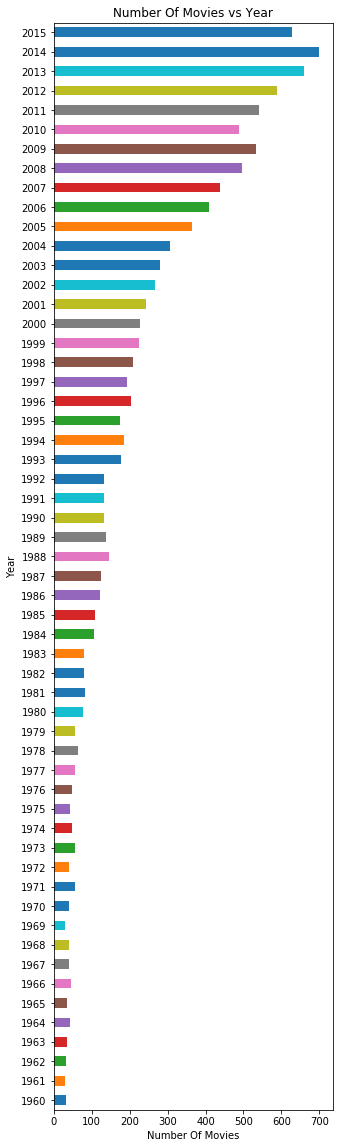

In [65]:
# plot relationship between release_year and number of movies
count_movies_year.plot(kind='barh',title='Number Of Movies vs Year', figsize=(5,20))
# x-axis name
plt.xlabel('Number Of Movies')
# y-axis name
plt.ylabel('Year')

In [66]:
# the above chart shows an obvious increase in the number of movies coming out every year
# next we will see if the month has a factor in the release date

In [106]:
# for starters I am going to split the release date into months
month = db['release_date'].dt.month

In [114]:
# count the number of movies released in every month then sort the result
count_movies_month = db["month"].value_counts().sort_index()

Text(0,0.5,'Month')

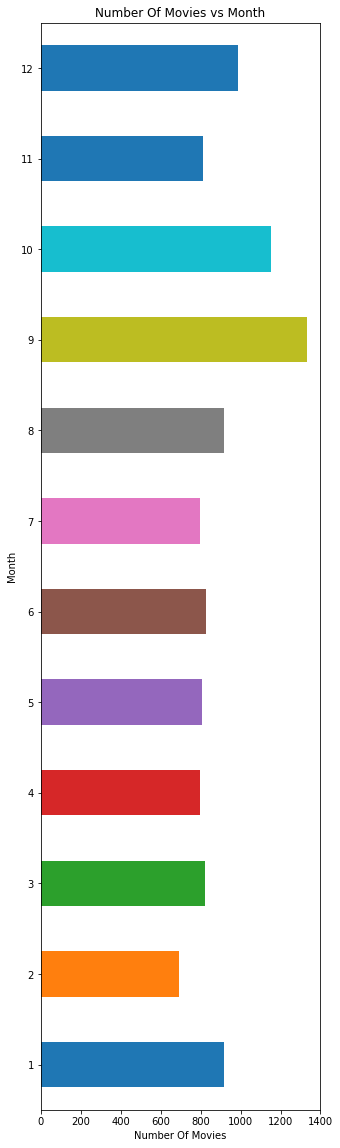

In [113]:
# plot relationship between the month it released and number of movies
count_movies_month.plot(kind='barh',title='Number Of Movies vs Month', figsize=(5,20))
# x-axis name
plt.xlabel('Number Of Movies')
# y-axis name
plt.ylabel('Month')

In [ ]:
# above we see that there is not as strong of a correlation between month and the number of releases
# there is a bit of a jump in month 9, but other wise it is decenlty consistant torughout the year. 

### Research Question 2  2. Is the popularity of movies getting better or worse?
The independent variable is release year while the dependent variable is movie popularity.
We will group by the table by year and calculate the mean of the movie popularity for each year. 
First we define a function to calculate the mean of one column then groupby the result by another column, then we will input out data into the function and create a table from that.
Before we start all of that, we are going to find some simple facts about our data and how it is all layed out. For example, we will find the release year from the earlist time and soonest time, the the most popularity something has, and the least popularity something has. Then we will look at the main columns we will be working with in a histogram format, the x-axis will be what the chart is about. 


In [121]:
db.release_year.min()

1960

In [122]:
db.release_year.max()

2015

In [123]:
db.popularity.min()

6.5000000000000008e-05

In [124]:
db.popularity.max()

32.985762999999999

In [125]:
# from the information above, we see that the data is resonalble and in normal parameters
#next we will show the histograms 

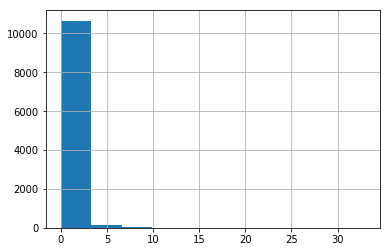

In [126]:
# this is showing how the popularity is spread out
# the popularity seems to never go above 10. 
db['popularity'].hist()

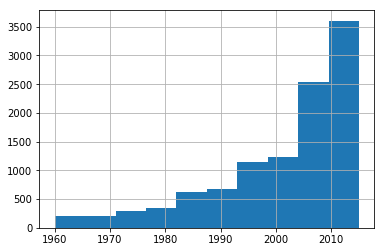

In [127]:
# this is how release year is spread out
db['release_year'].hist()

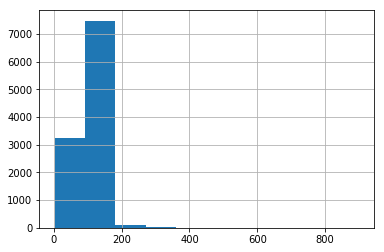

In [128]:
# and finally this is how the run time is spread out
db['runtime'].hist()

In [129]:
#now on to configuring the data we will be using and finding the answers
# definding a function to calculate the mean for column2 and groupby by column1
def groupby_avg(column1, column2):
    avg_gb_data = db.groupby(column1)[column2].mean()
    return avg_gb_data

In [130]:
# call the groupby_avg function and put in the relivent columns
popularity_by_year = groupby_avg('release_year', 'popularity')

Text(0,0.5,'Movie Popularity')

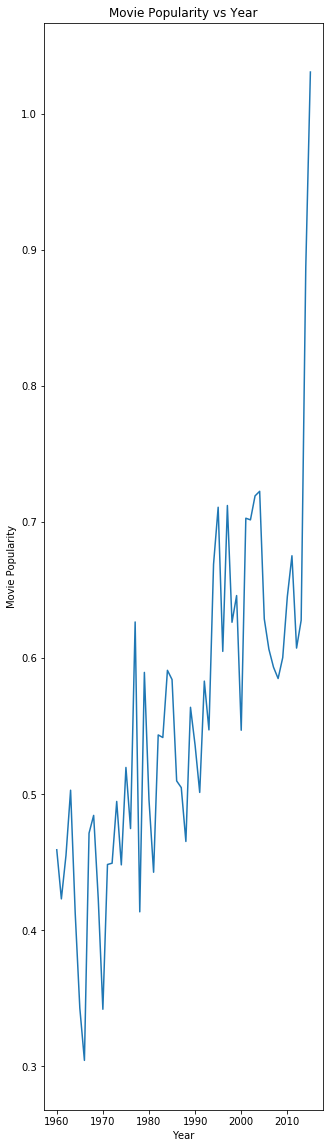

In [131]:
# plot the populairty by year
popularity_by_year.plot(kind='line',title='Movie Popularity vs Year', figsize=(5,20))
# x-axis name
plt.xlabel('Year')
# y-axis name
plt.ylabel('Movie Popularity')

In [134]:
popularity_by_release_month = groupby_avg ('month', 'popularity')

Text(0,0.5,'Movie Popularity')

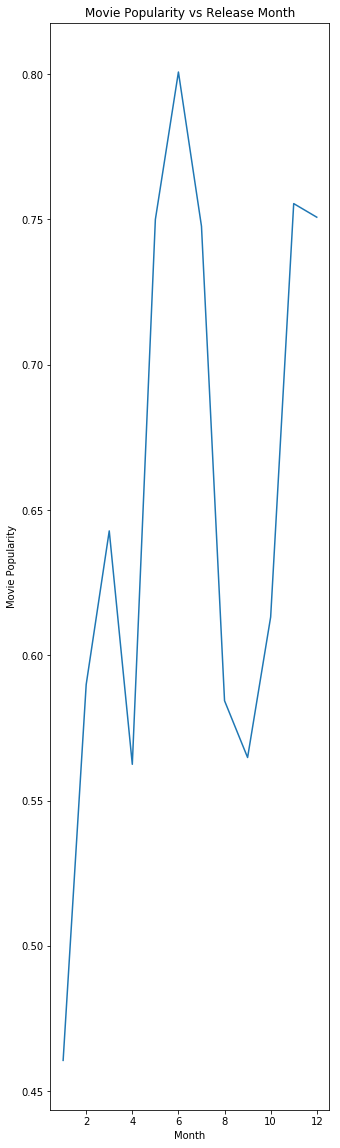

In [135]:
# then we plot the movie, like we did above
popularity_by_release_month.plot(kind='line',title='Movie Popularity vs Release Month', figsize=(5,20))
# x-axis name
plt.xlabel('Month')
# y-axis name
plt.ylabel('Movie Popularity')

In [ ]:
# here we see that there are correclations of when a movie comes out and how much it is liked
# it is not a linear correlation, but the popularity goes up in June and then starts to dip
# it hits another high in November and then in March 

In [132]:
# here we see the popularity be year, but I would like to see if there is a change with how long the movie is
# we do this by first getting a popularity by the length of the movie 
popularity_by_length = groupby_avg('runtime', 'popularity')

Text(0,0.5,'Movie Popularity')

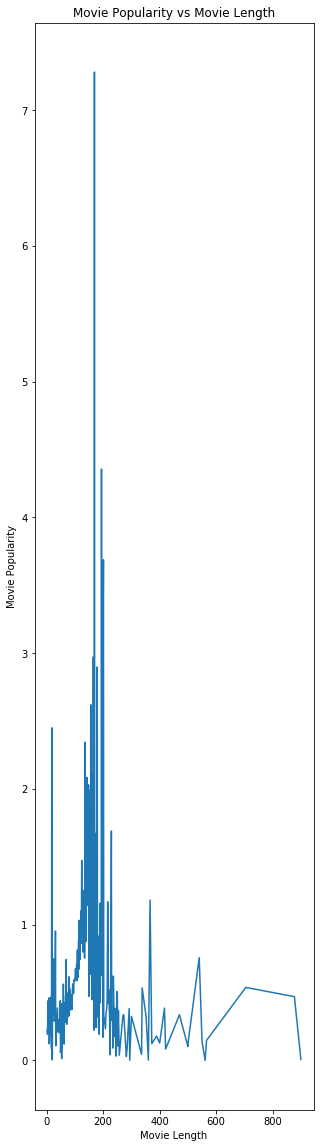

In [133]:
# then we plot the movie, like we did above
popularity_by_length.plot(kind='line',title='Movie Popularity vs Movie Length', figsize=(5,20))
# x-axis name
plt.xlabel('Movie Length')
# y-axis name
plt.ylabel('Movie Popularity')

In [ ]:
# above we see that there is a correlation on movie length and the popularity
# if a movie is over 200 min (which is a little over 3 hours), it it much less liked
# if a movie is between 60 and 200 min there is a larger chance of it being liked
# this is not a lenear compairison, but there is a great correlation

### Conclustion 
According to the bar graph in question one (how has the amount of movies released a year changed over time), we see that on average there are more movies coming out every year. There are some years that are less than the others. For some examples, 2015 released about 71 less movies than 2014 and 1988 relased 7 more movies thatn in 1989. This can be due to multiple favctors like cultural needs, money, and just the industy in general. We also found out that there is not a strong corellation in movie releases and the month of the year. This is strange due to the most popular time to film movies being in the summer, due to the hours of natural light and a smaller chance of having bad weather. 
According to the line graph in question two (is the popularity of movies getting better or worse?), there is a definate increase in movie popularity over the years. This can tell that starting around 2010 there has been a constint increase in movie popularity, this can be due to movie content, actors, or how the film industy has progressed. The month a movie comes out also has a lot to due to how popular it is. There are obvious high points in the populairty if the movie comes out in March, June, and November and then obvious low points if they come out in January, April, and September. I believe this due to the school calender. In March, June, and November is when most schools are in some sort of break and students are more relaxed and families can go out and do things. In January, April, and September are when school is either getting back after a break or near a time of lot of tests so families tend to stay at home. Lastly we found out that the movie length also has a lot to do with how popular it is. If a movie is a modern length time, 1-3 hours, it is much more liked than if it less than an hour ore more than 3 hours. This can be due to story development, content, and special effects. 

While this data is a great set, it does have some dowl falls. They mainly have to do with how old the movies are. The newest movie came out in 2015, that is about 9 years ago now. With in the last 9 years so much has changed in the film industry and so many movies have come out. In 2019 about 791 films where relased, then that number plumited due to covid and in 2021 only 406 movies where released. That alone is an insane amount of movies that could add so much input to this set of data. While it is great to have data on movies from the 1950s, that does not relect moden times at all, if we are looking at how film has changed over time, then its great. If we want to do much of anything with moden data then it does not help much. 
Another problem is in the timestamps of the data. As we found out in question 1, the years do not match when compairing the year listed in release year and the year in release date. That is something that shoudl not have happened. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])